In [1]:
import pandas as pd
import sqlite3

In [7]:
def clean_currency(x):
    """в строковых удаляем значки доллара, разделители и лишние пробелы, 
    числовые не трогаем и преобразовываем в дробное"""
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', '').replace(' USD', ''))
    return (x)

In [2]:
trips = pd.read_csv('Travel details dataset.csv', usecols=[0, 1, 2, 3, 4, 5, 9, 10, 11, 12], parse_dates=[2, 3])
trips.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",2023-05-01,2023-05-08,7.0,John Smith,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5.0,Jane Doe,Resort,800,Flight,500
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,David Lee,Villa,1000,Flight,700
3,4,"New York, USA",2023-08-15,2023-08-29,14.0,Sarah Johnson,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7.0,Kim Nguyen,Airbnb,700,Train,200


In [3]:
trips['Accommodation cost'].apply(type).value_counts()

<class 'str'>      137
<class 'float'>      2
Name: Accommodation cost, dtype: int64

In [4]:
trips['Transportation cost'].apply(type).value_counts()

<class 'str'>      136
<class 'float'>      3
Name: Transportation cost, dtype: int64

In [5]:
trips = trips.rename(columns={'Trip ID':'Trip_ID', 'Start date':'Start_date', 'End date':'End_date', 'Duration (days)':'Duration_days', 'Traveler name':'Traveler_name',
                              'Accommodation type':'Accommodation_type', 'Accommodation cost':'Accommodation_cost', 'Transportation type':'Transportation_type',
                              'Transportation cost':'Transportation_cost'})

In [8]:
trips['Transportation_cost'] = trips['Transportation_cost'].apply(clean_currency).astype('float')
trips['Accommodation_cost'] = trips['Accommodation_cost'].apply(clean_currency).astype('float')

In [9]:
trips['Total_costs'] = trips['Accommodation_cost'] + trips['Transportation_cost']
trips

,Trip_ID,Destination,Start_date,End_date,Duration_days,Traveler_name,Accommodation_type,Accommodation_cost,Transportation_type,Transportation_cost,Total_costs
0,1,"London, UK",2023-05-01,2023-05-08,7.0,John Smith,Hotel,1200.0,Flight,600.0,1800.0
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5.0,Jane Doe,Resort,800.0,Flight,500.0,1300.0
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,David Lee,Villa,1000.0,Flight,700.0,1700.0
3,4,"New York, USA",2023-08-15,2023-08-29,14.0,Sarah Johnson,Hotel,2000.0,Flight,1000.0,3000.0
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7.0,Kim Nguyen,Airbnb,700.0,Train,200.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,9.0,Jose Perez,Hostel,2500.0,Car,2000.0,4500.0
135,136,"Vancouver, Canada",2023-08-15,2023-08-21,6.0,Emma Wilson,Hotel,5000.0,Airplane,3000.0,8000.0
136,137,"Bangkok, Thailand",2023-09-01,2023-09-08,7.0,Ryan Chen,Hostel,2000.0,Train,1000.0,3000.0
137,138,"Barcelona, Spain",2023-09-15,2023-09-22,7.0,Sofia Rodriguez,Airbnb,6000.0,Airplane,2500.0,8500.0


In [10]:
from data_processing import Data_processing

In [11]:
empty_fulfill = Data_processing

In [12]:
empty_fulfill.EmptyData(trips)

в столбце Trip_ID - 0 пустых значений
в столбце Destination - 2 пустых значений
в столбце Start_date - 2 пустых значений
в столбце End_date - 2 пустых значений
в столбце Duration_days - 2 пустых значений
в столбце Traveler_name - 2 пустых значений
в столбце Accommodation_type - 2 пустых значений
в столбце Accommodation_cost - 2 пустых значений
в столбце Transportation_type - 3 пустых значений
в столбце Transportation_cost - 3 пустых значений
в столбце Total_costs - 3 пустых значений


In [13]:
empty_fulfill.FulFill(trips)

Заменены пустые значения:
в столбце Trip_ID - медиана 70.0
в столбце Destination - мода Bali - категориальное значение
в столбце Start_date - медиана 2023-06-15 00:00:00
в столбце End_date - медиана 2023-06-20 00:00:00
в столбце Duration_days - медиана 7.0
в столбце Traveler_name - мода David Lee - категориальное значение
в столбце Accommodation_type - мода Hotel - категориальное значение
в столбце Accommodation_cost - медиана 900.0
в столбце Transportation_type - мода Plane - категориальное значение
в столбце Transportation_cost - медиана 550.0
в столбце Total_costs - медиана 1400.0


In [14]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Trip_ID              139 non-null    int64         
 1   Destination          139 non-null    object        
 2   Start_date           139 non-null    datetime64[ns]
 3   End_date             139 non-null    datetime64[ns]
 4   Duration_days        139 non-null    float64       
 5   Traveler_name        139 non-null    object        
 6   Accommodation_type   139 non-null    object        
 7   Accommodation_cost   139 non-null    float64       
 8   Transportation_type  139 non-null    object        
 9   Transportation_cost  139 non-null    float64       
 10  Total_costs          139 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 12.1+ KB


In [15]:
city_country = trips['Destination'].str.split(',', expand = True)
city_country.columns = ['City', 'Country']
city_country['Destination'] = city_country['City'] + ', ' + city_country['Country']
city_country = city_country.drop_duplicates(subset = 'Destination').reset_index().drop(columns='index').fillna('-')
city_country

,City,Country,Destination
0,London,UK,"London, UK"
1,Phuket,Thailand,"Phuket, Thailand"
2,Bali,Indonesia,"Bali, Indonesia"
3,New York,USA,"New York, USA"
4,Tokyo,Japan,"Tokyo, Japan"
5,Paris,France,"Paris, France"
6,Sydney,Australia,"Sydney, Australia"
7,Rio de Janeiro,Brazil,"Rio de Janeiro, Brazil"
8,Amsterdam,Netherlands,"Amsterdam, Netherlands"
9,Dubai,United Arab Emirates,"Dubai, United Arab Emirates"


In [16]:
travelers = pd.read_csv('Travel details dataset.csv', usecols=[0, 5, 6, 7, 8])

In [17]:
empty_fulfill.EmptyData(travelers)

в столбце Trip ID - 0 пустых значений
в столбце Traveler name - 2 пустых значений
в столбце Traveler age - 2 пустых значений
в столбце Traveler gender - 2 пустых значений
в столбце Traveler nationality - 2 пустых значений


In [18]:
travelers[travelers.isnull().any(axis=1)]

,Trip ID,Traveler name,Traveler age,Traveler gender,Traveler nationality
71,72,NaN,NaN,NaN,NaN
127,128,NaN,NaN,NaN,NaN


In [19]:
travelers = travelers.rename(columns={'Trip ID':'Trip_ID','Traveler name':'Traveler_name', 'Traveler age':'Traveler_age', 'Traveler gender':'Traveler_gender', 
                                      'Traveler nationality':'Traveler_nationality'}).drop_duplicates(subset = 'Traveler_name', keep = 'first').dropna()

In [92]:
travelers

,Trip_ID,Traveler_name,Traveler_age,Traveler_gender,Traveler_nationality
0,1,John Smith,35.0,Male,American
1,2,Jane Doe,28.0,Female,Canadian
2,3,David Lee,45.0,Male,Korean
3,4,Sarah Johnson,29.0,Female,British
4,5,Kim Nguyen,26.0,Female,Vietnamese
...,...,...,...,...,...
134,135,Jose Perez,37.0,Male,Brazilian
135,136,Emma Wilson,29.0,Female,Canadian
136,137,Ryan Chen,34.0,Male,Chinese
137,138,Sofia Rodriguez,25.0,Female,Spanish


In [20]:
travelers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 138
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip_ID               109 non-null    int64  
 1   Traveler_name         109 non-null    object 
 2   Traveler_age          109 non-null    float64
 3   Traveler_gender       109 non-null    object 
 4   Traveler_nationality  109 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ KB


In [22]:
connection = sqlite3.connect('trips_database.db')
cursor = connection.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS Trips_sql (
Trip_id INTEGER PRIMARY KEY,
Destination TEXT,
Start_date DATE,
End_date DATE,
Duration_days REAL,
Traveler_name TEXT,
Accommodation_type TEXT,
Accommodation_cost REAL,
Transportation_type TEXT,
Transportation_cost REAL,
Total_costs REAL NOT NULL
)''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Travelers_sql (
Trip_id INTEGER PRIMARY KEY,
Traveler_name TEXT NOT NULL,
Traveler_age REAL NOT NULL,
Traveler_gender TEXT NOT NULL,
Traveler_nationality TEXT NOT NULL
)''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Destinations_sql (
Destination TEXT PRIMARY KEY,
City TEXT NOT NULL,
Country	TEXT NOT NULL
)''')

connection.commit()


In [23]:
travelers.to_sql('Travelers_sql', connection, if_exists='append',  index = False)

109

In [24]:
trips.to_sql('Trips_sql', connection, if_exists='append',  index = False)

139

In [25]:
cursor.execute("SELECT * FROM Trips_sql")
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'London, UK', '2023-05-01 00:00:00', '2023-05-08 00:00:00', 7.0, 'John Smith', 'Hotel', 1200.0, 'Flight', 600.0, 1800.0)
(2, 'Phuket, Thailand', '2023-06-15 00:00:00', '2023-06-20 00:00:00', 5.0, 'Jane Doe', 'Resort', 800.0, 'Flight', 500.0, 1300.0)
(3, 'Bali, Indonesia', '2023-07-01 00:00:00', '2023-07-08 00:00:00', 7.0, 'David Lee', 'Villa', 1000.0, 'Flight', 700.0, 1700.0)
(4, 'New York, USA', '2023-08-15 00:00:00', '2023-08-29 00:00:00', 14.0, 'Sarah Johnson', 'Hotel', 2000.0, 'Flight', 1000.0, 3000.0)
(5, 'Tokyo, Japan', '2023-09-10 00:00:00', '2023-09-17 00:00:00', 7.0, 'Kim Nguyen', 'Airbnb', 700.0, 'Train', 200.0, 900.0)
(6, 'Paris, France', '2023-10-05 00:00:00', '2023-10-10 00:00:00', 5.0, 'Michael Brown', 'Hotel', 1500.0, 'Flight', 800.0, 2300.0)
(7, 'Sydney, Australia', '2023-11-20 00:00:00', '2023-11-30 00:00:00', 10.0, 'Emily Davis', 'Hostel', 500.0, 'Flight', 1200.0, 1700.0)
(8, 'Rio de Janeiro, Brazil', '2024-01-05 00:00:00', '2024-01-12 00:00:00', 7.0, 'Lucas Santo

In [26]:
cursor.execute("SELECT * FROM Travelers_sql")
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'John Smith', 35.0, 'Male', 'American')
(2, 'Jane Doe', 28.0, 'Female', 'Canadian')
(3, 'David Lee', 45.0, 'Male', 'Korean')
(4, 'Sarah Johnson', 29.0, 'Female', 'British')
(5, 'Kim Nguyen', 26.0, 'Female', 'Vietnamese')
(6, 'Michael Brown', 42.0, 'Male', 'American')
(7, 'Emily Davis', 33.0, 'Female', 'Australian')
(8, 'Lucas Santos', 25.0, 'Male', 'Brazilian')
(9, 'Laura Janssen', 31.0, 'Female', 'Dutch')
(10, 'Mohammed Ali', 39.0, 'Male', 'Emirati')
(11, 'Ana Hernandez', 27.0, 'Female', 'Mexican')
(12, 'Carlos Garcia', 36.0, 'Male', 'Spanish')
(13, 'Lily Wong', 29.0, 'Female', 'Chinese')
(14, 'Hans Mueller', 48.0, 'Male', 'German')
(15, 'Fatima Khouri', 26.0, 'Female', 'Moroccan')
(16, 'James MacKenzie', 32.0, 'Male', 'Scottish')
(18, 'Michael Chang', 28.0, 'Male', 'Chinese')
(19, 'Olivia Rodriguez', 35.0, 'Female', 'British')
(20, 'Kenji Nakamura', 45.0, 'Male', 'Japanese')
(21, 'Emily Lee', 27.0, 'Female', 'American')
(22, 'James Wilson', 32.0, 'Male', 'Australian')
(23, 'Sofia

In [27]:
city_country.to_sql('Destinations_sql', connection, if_exists='append',  index = False)

31

In [28]:
cursor.execute("SELECT * FROM Destinations_sql")
result = cursor.fetchall()
for row in result:
    print(row)

('London,  UK', 'London', ' UK')
('Phuket,  Thailand', 'Phuket', ' Thailand')
('Bali,  Indonesia', 'Bali', ' Indonesia')
('New York,  USA', 'New York', ' USA')
('Tokyo,  Japan', 'Tokyo', ' Japan')
('Paris,  France', 'Paris', ' France')
('Sydney,  Australia', 'Sydney', ' Australia')
('Rio de Janeiro,  Brazil', 'Rio de Janeiro', ' Brazil')
('Amsterdam,  Netherlands', 'Amsterdam', ' Netherlands')
('Dubai,  United Arab Emirates', 'Dubai', ' United Arab Emirates')
('Cancun,  Mexico', 'Cancun', ' Mexico')
('Barcelona,  Spain', 'Barcelona', ' Spain')
('Honolulu,  Hawaii', 'Honolulu', ' Hawaii')
('Berlin,  Germany', 'Berlin', ' Germany')
('Marrakech,  Morocco', 'Marrakech', ' Morocco')
('Edinburgh,  Scotland', 'Edinburgh', ' Scotland')
('-', 'Paris', '-')
('New York City,  USA', 'New York City', ' USA')
('Bangkok,  Thailand', 'Bangkok', ' Thailand')
('Vancouver,  Canada', 'Vancouver', ' Canada')
('Sydney,  AUS', 'Sydney', ' AUS')
('Seoul,  South Korea', 'Seoul', ' South Korea')
('Los Angeles, 

In [29]:
cursor.execute('SELECT Traveler_age, Traveler_nationality FROM Travelers_sql WHERE Traveler_age > ?', (33,))
results = cursor.fetchall()
for row in results:
    print(row)


(35.0, 'American')
(45.0, 'Korean')
(42.0, 'American')
(39.0, 'Emirati')
(36.0, 'Spanish')
(48.0, 'German')
(35.0, 'British')
(45.0, 'Japanese')
(40.0, 'Indian')
(34.0, 'Korean')
(45.0, 'Canadian')
(37.0, 'Canadian')
(42.0, 'British')
(38.0, 'Australian')
(55.0, 'British')
(41.0, 'American')
(35.0, 'British')
(35.0, 'American')
(39.0, 'French')
(41.0, 'Italian')
(37.0, 'British')
(35.0, 'South Korean')
(42.0, 'Mexican')
(60.0, 'American')
(41.0, 'American')
(50.0, 'China')
(42.0, 'Japan')
(41.0, 'Germany')
(38.0, 'United Kingdom')
(45.0, 'Singapore')
(41.0, 'American')
(35.0, 'Korean')
(35.0, 'American')
(45.0, 'South African')
(37.0, 'Brazilian')
(34.0, 'Chinese')
(39.0, 'New Zealander')


In [30]:
cursor.execute('SELECT Traveler_nationality, Traveler_age FROM Travelers_sql GROUP BY Traveler_nationality, Traveler_age')
results = cursor.fetchall()
for row in results:
    print(row)


('American', 20.0)
('American', 25.0)
('American', 27.0)
('American', 28.0)
('American', 29.0)
('American', 30.0)
('American', 31.0)
('American', 35.0)
('American', 41.0)
('American', 42.0)
('American', 60.0)
('Australian', 32.0)
('Australian', 33.0)
('Australian', 38.0)
('Brazil', 33.0)
('Brazilian', 25.0)
('Brazilian', 30.0)
('Brazilian', 37.0)
('British', 28.0)
('British', 29.0)
('British', 32.0)
('British', 35.0)
('British', 37.0)
('British', 42.0)
('British', 55.0)
('Cambodia', 33.0)
('Canada', 28.0)
('Canadian', 28.0)
('Canadian', 29.0)
('Canadian', 31.0)
('Canadian', 33.0)
('Canadian', 37.0)
('Canadian', 45.0)
('China', 50.0)
('Chinese', 26.0)
('Chinese', 28.0)
('Chinese', 29.0)
('Chinese', 30.0)
('Chinese', 34.0)
('Dutch', 31.0)
('Emirati', 24.0)
('Emirati', 39.0)
('French', 39.0)
('German', 48.0)
('Germany', 41.0)
('Greece', 27.0)
('Indian', 23.0)
('Indian', 29.0)
('Indian', 33.0)
('Indian', 40.0)
('Indonesian', 33.0)
('Italian', 29.0)
('Italian', 30.0)
('Italian', 33.0)
('Ita

In [31]:
cursor.execute('SELECT COUNT(Country) FROM Destinations_sql')
total_countries = cursor.fetchone()[0]
print('Общее количество посещенных стран:', total_countries)

Общее количество посещенных стран: 31


In [32]:
cursor.execute('SELECT SUM(Transportation_cost) FROM Trips_sql')
total_transport_costs = cursor.fetchone()[0]
print('Общая сумма транспортных расходов:', total_transport_costs, 'USD')

Общая сумма транспортных расходов: 89395.0 USD


In [33]:
cursor.execute('SELECT AVG(Traveler_age) FROM Travelers_sql')
average_age = round(cursor.fetchone()[0], 1)
print('Средний возраст путешественника:', average_age, 'лет')

Средний возраст путешественника: 32.7 лет


In [34]:
cursor.execute('SELECT MIN(Traveler_age) FROM Travelers_sql')
min_age = cursor.fetchone()[0]
print('Самый молодой путешественник имеет возраст', min_age, 'лет')

Самый молодой путешественник имеет возраст 20.0 лет


In [35]:
cursor.execute('SELECT MAX(Accommodation_cost) FROM Trips_sql')
max_accom_costs = cursor.fetchone()[0]
print('Самое дорогое размещение стоило', max_accom_costs, 'USD')

Самое дорогое размещение стоило 8000.0 USD


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
cursor.execute('CREATE TABLE Costs_by_Tr AS SELECT Trips_sql.Trip_id, Trips_sql.Total_costs, Travelers_sql.Traveler_age FROM Trips_sql \
               LEFT JOIN Travelers_sql ON Trips_sql.Trip_ID=Travelers_sql.Trip_ID')

In [39]:
cursor.execute('SELECT * FROM Costs_by_tr')
table = cursor.fetchall()
for row in table:
    print(row)

(1, 1800.0, 35.0)
(2, 1300.0, 28.0)
(3, 1700.0, 45.0)
(4, 3000.0, 29.0)
(5, 900.0, 26.0)
(6, 2300.0, 42.0)
(7, 1700.0, 33.0)
(8, 1500.0, 25.0)
(9, 1400.0, 31.0)
(10, 3300.0, 39.0)
(11, 1500.0, 27.0)
(12, 900.0, 36.0)
(13, 4200.0, 29.0)
(14, 2100.0, 48.0)
(15, 1000.0, 26.0)
(16, 1050.0, 32.0)
(17, 1300.0, None)
(18, 2200.0, 28.0)
(19, 1350.0, 35.0)
(20, 2000.0, 45.0)
(21, 700.0, 27.0)
(22, 1600.0, 32.0)
(23, 780.0, 29.0)
(24, 900.0, 40.0)
(25, 1500.0, 24.0)
(26, 2800.0, 34.0)
(27, 1250.0, 31.0)
(28, 1300.0, 30.0)
(29, 350.0, 45.0)
(30, 900.0, 25.0)
(31, 1500.0, 28.0)
(32, 200.0, 33.0)
(33, 1000.0, 20.0)
(34, 800.0, 37.0)
(35, 1300.0, 42.0)
(36, 300.0, 31.0)
(37, 1300.0, 27.0)
(38, 425.0, 38.0)
(39, 2000.0, None)
(40, 950.0, 33.0)
(41, 1400.0, 28.0)
(42, 3000.0, None)
(43, 1900.0, 30.0)
(44, 1000.0, 55.0)
(45, 1200.0, 27.0)
(46, 2000.0, 41.0)
(47, 550.0, 29.0)
(48, 550.0, 24.0)
(49, 1800.0, 31.0)
(50, 1500.0, 31.0)
(51, 600.0, None)
(52, 1100.0, 27.0)
(53, 2200.0, 28.0)
(54, 950.0, 30.0)

In [40]:
cursor.execute('SELECT Total_costs FROM Costs_by_tr')
costs = cursor.fetchall()
for row in costs:
    print(row)

(1800.0,)
(1300.0,)
(1700.0,)
(3000.0,)
(900.0,)
(2300.0,)
(1700.0,)
(1500.0,)
(1400.0,)
(3300.0,)
(1500.0,)
(900.0,)
(4200.0,)
(2100.0,)
(1000.0,)
(1050.0,)
(1300.0,)
(2200.0,)
(1350.0,)
(2000.0,)
(700.0,)
(1600.0,)
(780.0,)
(900.0,)
(1500.0,)
(2800.0,)
(1250.0,)
(1300.0,)
(350.0,)
(900.0,)
(1500.0,)
(200.0,)
(1000.0,)
(800.0,)
(1300.0,)
(300.0,)
(1300.0,)
(425.0,)
(2000.0,)
(950.0,)
(1400.0,)
(3000.0,)
(1900.0,)
(1000.0,)
(1200.0,)
(2000.0,)
(550.0,)
(550.0,)
(1800.0,)
(1500.0,)
(600.0,)
(1100.0,)
(2200.0,)
(950.0,)
(450.0,)
(1200.0,)
(950.0,)
(520.0,)
(1500.0,)
(900.0,)
(2000.0,)
(700.0,)
(1000.0,)
(2700.0,)
(1600.0,)
(3200.0,)
(1300.0,)
(1800.0,)
(1000.0,)
(1400.0,)
(2800.0,)
(1400.0,)
(1300.0,)
(1200.0,)
(1300.0,)
(1900.0,)
(700.0,)
(1300.0,)
(1500.0,)
(800.0,)
(2500.0,)
(1500.0,)
(1400.0,)
(1300.0,)
(800.0,)
(1900.0,)
(1500.0,)
(900.0,)
(700.0,)
(1800.0,)
(500.0,)
(550.0,)
(1800.0,)
(950.0,)
(1300.0,)
(600.0,)
(1400.0,)
(1300.0,)
(1100.0,)
(1600.0,)
(400.0,)
(2000.0,)
(1300.0,)
(

In [41]:
cursor.execute('SELECT Traveler_age FROM Costs_by_tr')
ages = cursor.fetchall()
for row in ages:
    print(row)

(35.0,)
(28.0,)
(45.0,)
(29.0,)
(26.0,)
(42.0,)
(33.0,)
(25.0,)
(31.0,)
(39.0,)
(27.0,)
(36.0,)
(29.0,)
(48.0,)
(26.0,)
(32.0,)
(None,)
(28.0,)
(35.0,)
(45.0,)
(27.0,)
(32.0,)
(29.0,)
(40.0,)
(24.0,)
(34.0,)
(31.0,)
(30.0,)
(45.0,)
(25.0,)
(28.0,)
(33.0,)
(20.0,)
(37.0,)
(42.0,)
(31.0,)
(27.0,)
(38.0,)
(None,)
(33.0,)
(28.0,)
(None,)
(30.0,)
(55.0,)
(27.0,)
(41.0,)
(29.0,)
(24.0,)
(31.0,)
(31.0,)
(None,)
(27.0,)
(28.0,)
(30.0,)
(23.0,)
(35.0,)
(29.0,)
(27.0,)
(26.0,)
(33.0,)
(35.0,)
(None,)
(29.0,)
(None,)
(31.0,)
(27.0,)
(39.0,)
(25.0,)
(33.0,)
(41.0,)
(37.0,)
(None,)
(35.0,)
(29.0,)
(42.0,)
(None,)
(31.0,)
(25.0,)
(None,)
(27.0,)
(60.0,)
(32.0,)
(41.0,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(24.0,)
(26.0,)
(30.0,)
(33.0,)
(27.0,)
(None,)
(28.0,)
(None,)
(None,)
(50.0,)
(31.0,)
(42.0,)
(None,)
(33.0,)
(29.0,)
(41.0,)
(None,)
(None,)
(None,)
(30.0,)
(None,)
(38.0,)
(45.0,)
(31.0,)
(27.0,)
(29.0,)
(33.0,)
(None,)
(None,)
(26.0,)
(None,)
(29.0,)
(41.0,)
(35.0,)
(24.0,)
(30.0,)


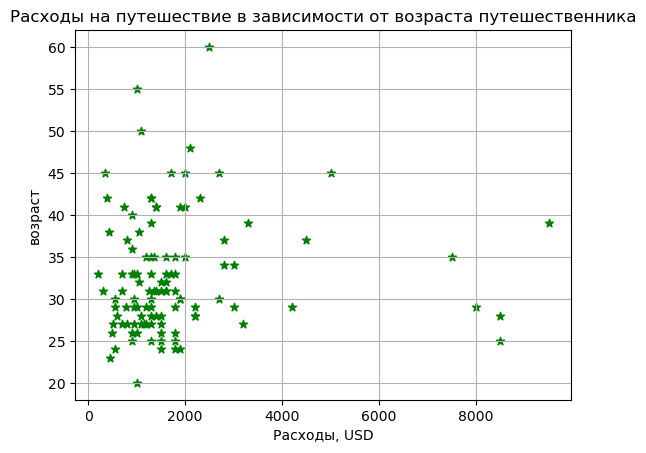

In [59]:
fig, ax = plt.subplots()
ax.scatter(costs, ages, marker='*', color = 'green')
ax.set(xlabel= 'Расходы, USD', ylabel = 'возраст', title='Расходы на путешествие в зависимости от возраста путешественника')
ax.grid()
plt.show()

Text(0.5, 1.0, 'Возраст путешественников')

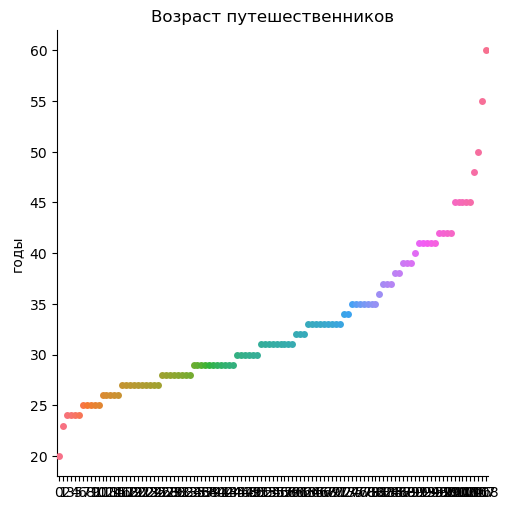

In [125]:
cursor.execute('SELECT Traveler_age FROM Travelers_sql ORDER BY Traveler_age ASC')
age_sort = cursor.fetchall()

sns.catplot(age_sort)
plt.ylabel('годы')
plt.title('Возраст путешественников')

In [83]:
cursor.execute('SELECT Duration_days FROM Trips_sql')
days = cursor.fetchall()

cursor.execute('SELECT Total_costs FROM Trips_sql')
total_costs = cursor.fetchall()

cursor.execute('SELECT MAX(Total_costs) FROM Trips_sql')
max_costs = cursor.fetchone()[0]
print(max_costs)

10500.0


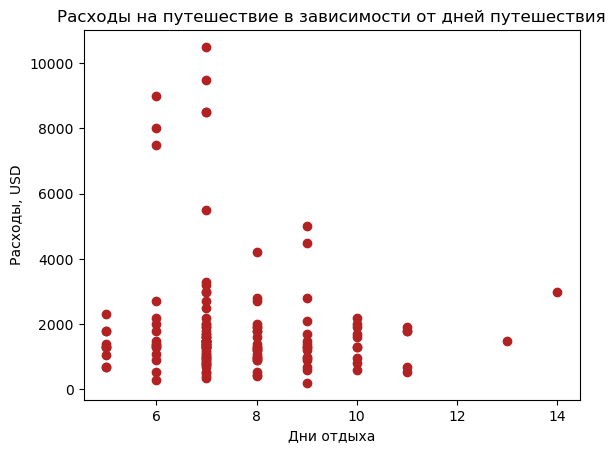

In [86]:
fig, ax = plt.subplots()
ax.scatter(days, total_costs, color = 'firebrick')
ax.set(xlabel= 'Дни отдыха', ylabel = 'Расходы, USD', title='Расходы на путешествие в зависимости от дней путешествия')
plt.show()

In [102]:
cursor.execute('CREATE TABLE Trip_countries AS SELECT Trips_sql.Trip_id, Trips_sql.Destination, Trips_sql.Duration_days, Trips_sql.Total_costs, Destinations_sql.Destination, Destinations_sql.Country FROM Trips_sql \
               JOIN Destinations_sql ON Trips_sql.Destination=Destinations_sql.Destination')

In [107]:
cursor.execute('SELECT * FROM Trip_countries')
geography = cursor.fetchall()
for row in geography:
    print(row)

(1, 'London, UK', None)
(2, 'Phuket, Thailand', None)
(3, 'Bali, Indonesia', None)
(4, 'New York, USA', None)
(5, 'Tokyo, Japan', None)
(6, 'Paris, France', None)
(7, 'Sydney, Australia', None)
(8, 'Rio de Janeiro, Brazil', None)
(9, 'Amsterdam, Netherlands', None)
(10, 'Dubai, United Arab Emirates', None)
(11, 'Cancun, Mexico', None)
(12, 'Barcelona, Spain', None)
(13, 'Honolulu, Hawaii', None)
(14, 'Berlin, Germany', None)
(15, 'Marrakech, Morocco', None)
(16, 'Edinburgh, Scotland', None)
(17, 'Paris', None)
(18, 'Bali', None)
(19, 'London', None)
(20, 'Tokyo', None)
(21, 'New York', None)
(22, 'Sydney', None)
(23, 'Rome', None)
(24, 'Bangkok', None)
(25, 'Paris', None)
(26, 'Hawaii', None)
(27, 'Barcelona', None)
(28, 'Japan', None)
(29, 'Thailand', None)
(30, 'France', None)
(31, 'Australia', None)
(32, 'Brazil', None)
(33, 'Greece', None)
(34, 'Egypt', None)
(35, 'Mexico', None)
(36, 'Italy', None)
(37, 'Spain', None)
(38, 'Canada', None)
(39, 'Paris, France', None)
(40, 'Sydney, 

In [ ]:
connection.commit()
connection.close()